In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)

In [98]:
consumption = pd.read_csv('../../Data/Fish/fish-and-seafood-consumption-per-capita.csv')
production = pd.read_csv('../../Data/Fish/fish-seafood-production.csv')
population = pd.read_csv('../../Data/Fish/population.csv')

In [99]:
consumption

,Entity,Code,Year,Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita
0,Afghanistan,AFG,1961,0.030559
1,Afghanistan,AFG,1962,0.030578
2,Afghanistan,AFG,1963,0.030598
3,Afghanistan,AFG,1964,0.030614
4,Afghanistan,AFG,1965,0.030627
...,...,...,...,...
12355,Zimbabwe,ZWE,2016,3.679239
12356,Zimbabwe,ZWE,2017,3.397224
12357,Zimbabwe,ZWE,2018,3.117559
12358,Zimbabwe,ZWE,2019,2.870986


In [100]:
production

,Entity,Code,Year,Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0
...,...,...,...,...
12550,Zimbabwe,ZWE,2016,25800.0
12551,Zimbabwe,ZWE,2017,26800.0
12552,Zimbabwe,ZWE,2018,32300.0
12553,Zimbabwe,ZWE,2019,29230.0


In [101]:
production = production.rename(columns={'Fish and seafood | 00002960 || Production | 005511 || tonnes': 'Production_in_tons'})


In [102]:
production

,Entity,Code,Year,Production_in_tons
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0
...,...,...,...,...
12550,Zimbabwe,ZWE,2016,25800.0
12551,Zimbabwe,ZWE,2017,26800.0
12552,Zimbabwe,ZWE,2018,32300.0
12553,Zimbabwe,ZWE,2019,29230.0


In [103]:
population = population[population['Year'] > 1960].reset_index(drop=True)

In [104]:
population

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,1961,8790140
1,Afghanistan,AFG,1962,8969055
2,Afghanistan,AFG,1963,9157463
3,Afghanistan,AFG,1964,9355510
4,Afghanistan,AFG,1965,9565154
...,...,...,...,...
15787,Zimbabwe,ZWE,2017,14751101
15788,Zimbabwe,ZWE,2018,15052191
15789,Zimbabwe,ZWE,2019,15354606
15790,Zimbabwe,ZWE,2020,15669663


In [105]:
columns_to_merge = ['Year', 'Code', 'Production_in_tons']

temp = consumption.merge(production[columns_to_merge], on=['Year', 'Code'])


In [106]:
temp2 = temp.rename(columns={'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita': 'kg_per_yr_per_capita'})

In [107]:
to_add = ['Code', 'Year','Population (historical estimates)', 'Entity']
merged_df = temp2.merge(population[to_add], on=['Code', 'Year', 'Entity'])



In [114]:
merged_df


In [109]:
df = merged_df
df['Code'].value_counts()

AFG    60
MUS    60
MNG    60
MAR    60
MOZ    60
       ..
BHR     2
SSD     2
QAT     2
FSM     2
NRU     2
Name: Code, Length: 194, dtype: int64

In [110]:
df = df[df['Code'] == 'USA']

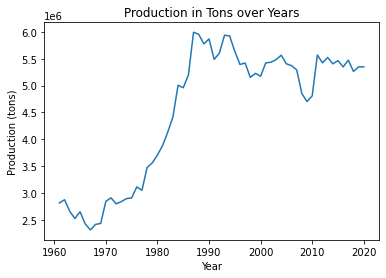

In [111]:

df_grouped = df.groupby('Year')['Production_in_tons'].sum()

plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.title('Production in Tons over Years')
plt.show()

In [112]:
X = df[['kg_per_yr_per_capita', 'Population (historical estimates)']]
y = df['Production_in_tons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', model.score(X_test, y_test))

Root Mean Squared Error: 392706.89193194784
R-squared Score: 0.9050076252850638
